### Example of a least-squares fitter for hetrogenious data

This isn't really starter code for the assignment, but does something analogous to
what is required for the assignement, but in the familiar context of fitting a line.

Don't forget to run `pip install .` in the repo directory before running this
notebook.

In [1]:
# This sets how figures will be displayed.
%matplotlib inline

# Import libraries we will use
import numpy as np
import matplotlib.pyplot as plt

from expansion_fitter import fitters

In [2]:
# I'm going to fit a linear model (a straight line) using non-linear techniques.
# Then add in a twist: add a direct measurement of the slope of the line,
# which makes the data hetrogenious.


# Normal x-y data.
x = np.array([1., 3., 4., 6., 7.])
y_measured = np.array([-1.2, 1.86, 1.47, 4.37, 4.74])
y_error = np.array([1.00, 0.60, 0.50, 0.41, 0.38])

# Direct slope measurement.
slope_measured = 0.828
slope_measured_error = 0.060

In [3]:
# First do the fit without the direct slope measurement
fitter1 = fitters.LineFitter(x, y_measured, y_error)
pars_est1, covariance1 = fitter1.fit([1, 1])
errors1 = np.sqrt(np.diagonal(covariance1))

# Now with the direct slope constraint
fitter2 = fitters.LineFitterWithSlopeMeasurement(x, y_measured, y_error, slope_measured, slope_measured_error)
pars_est2, covariance2 = fitter2.fit([1, 1])
errors2 = np.sqrt(np.diagonal(covariance2))

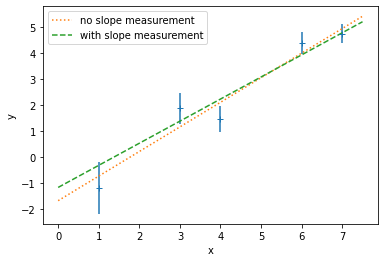

In [4]:
# Plots of the data and best fit lines for both fits.

def line(slope, offset, x):
    """y = mx + b"""
    return slope * x + offset

# Plot the data
plt.errorbar(x, y_measured, y_error, linestyle='', marker='+')
plt.xlabel("x")
plt.ylabel("y")
# Add best fit lines to our plot.
x_range = np.array([0, 7.5])
plt.plot(x_range, line(pars_est1[0], pars_est1[1], x_range), linestyle=':',
         label="no slope measurement")
plt.plot(x_range, line(pars_est2[0], pars_est2[1], x_range), linestyle='--',
         label="with slope measurement")
plt.legend()


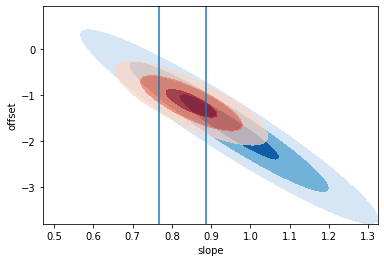

In [5]:
# Plots of the parameter space constraints for both fits

# Create arrays of parameter-space location offsets from best fit.
delta_par_slope, delta_par_offset = np.meshgrid(
        np.linspace(-3 * errors1[0], 3 * errors1[0], 100),
        np.linspace(-3 * errors1[1], 3 * errors1[1], 100),
        )

# Calculate how far each point in parameter space is from the best fit location.
nsigmas = np.array([[ fitters.n_signmas_pars(delta_par_slope[ii, jj], delta_par_offset[ii, jj], covariance1)
                   for ii in range(len(delta_par_slope)) ] for jj in range(len(delta_par_offset)) ])
plt.figure(1)
plt.contourf(
        delta_par_slope + pars_est1[0],
        delta_par_offset + pars_est1[1],
        # Negative sign just to reverse the colormap.
        -nsigmas,
        levels=-np.array([-0.1, 1, 2, 3])[::-1],
        cmap=plt.cm.Blues,
        )
plt.xlabel("slope")
plt.ylabel("offset")


plt.axvline(slope_measured - slope_measured_error)
plt.axvline(slope_measured + slope_measured_error)

nsigmas = np.array([[ fitters.n_signmas_pars(delta_par_slope[ii, jj], delta_par_offset[ii, jj], covariance2)
                   for ii in range(len(delta_par_slope)) ] for jj in range(len(delta_par_offset)) ])
plt.figure(1)
plt.contourf(
        delta_par_slope + pars_est2[0],
        delta_par_offset + pars_est2[1],
        # Negative sign just to reverse the colormap.
        -nsigmas,
        levels=-np.array([-0.1, 1, 2, 3])[::-1],
        cmap=plt.cm.Reds,
        alpha=0.7
        )

